# 分类器

## 简单分类器

In [11]:
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as sl

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


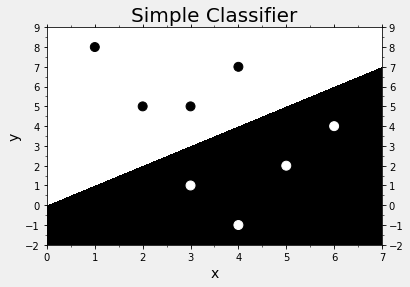

In [10]:
def make_data():
    x = np.array([
        [3,1],
        [2,5],
        [1,8],
        [6,4],
        [5,2],
        [3,5],
        [4,7],
        [4,-1]
    ])
    y = np.array([0,1,1,0,0,1,1,0])
    return x,y

def pred_model(x):
    y = np.zeros(len(x),dtype=int)
    y[x[:,0] < x[:,1]] = 1
    return y

def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('Simple Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    # 设置刻度定位器
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    # 伪彩图，可以画出分界线
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,
                 cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())

def draw_data(x,y):
    # c为颜色，cmap为颜色映射
    mp.scatter(x[:,0],x[:,1],c=1-y,cmap='gray',s=80)
    mp.show()
    
def main():
    x,y  =  make_data()
    # 左，右，和水平方向的步长
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 生成网格矩阵
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    # ravel()把矩阵展平
    grid_y = pred_model(
        np.c_[grid_x[0].ravel(),
        grid_x[1].ravel()]
    ).reshape(grid_x[0].shape)
    print(grid_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    return 0

if __name__ == '__main__':
    main()
    

## 逻辑回归分类器

/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


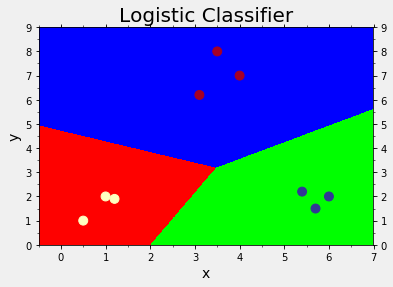

In [12]:
def make_data():
    x = np.array([
        [4,7],
        [3.5,8],
        [3.1,6.2],
        [0.5,1],
        [1,2],
        [1.2,1.9],
        [6,2],
        [5.7,1.5],
        [5.4,2.2]
    ])
    y = np.array([0,0,0,1,1,1,2,2,2])
    return x,y

def train_model(x,y):
    # solver为回归算法，liblinear是线性算法器
    # C惩罚系数
    model = sl.LogisticRegression(solver='liblinear',
                                 C=100,)
    model.fit(x,y)
    return model
    

def pred_model(model,x):
    y = model.predict(x)
    return y

def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('Logistic Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    # 设置刻度定位器
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    # 伪彩图，可以画出分界线
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,
                 cmap='brg')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())

def draw_data(x,y):
    # c为颜色，cmap为颜色映射
    mp.scatter(x[:,0],x[:,1],c=y,cmap='RdYlBu',s=80)
    mp.show()
    
def main():
    x,y  =  make_data()
    # 左，右，和水平方向的步长
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    model = train_model(x,y)
    # 生成网格矩阵
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    # ravel()把矩阵展平
    grid_y = pred_model(
        model,
        np.c_[grid_x[0].ravel(),
        grid_x[1].ravel()]
    ).reshape(grid_x[0].shape)
    print(grid_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    return 0

if __name__ == '__main__':
    main()
    